# Team 4
Stephen Crocker, Jack Moss, Martin Wu

In [15]:
import sys
assert sys.version_info >= (3, 5)
import time
import warnings
import os
import math

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn.linear_model

import seaborn as sns

import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from scipy.stats import pearsonr
warnings.filterwarnings("ignore")

#Options and parameters.
dataFileName = "country_vaccinations.csv"

#Load the file using pandas
df = pd.read_csv(dataFileName)
print(df.head())

#Establish the helper functions
def showDescriptiveStats(dataFrame, featureName):
    print(featureName, " | set stats: ")
    print(dataFrame[featureName].describe())
    print('\n')
    return None

#Establish the helper functions
def clearNullsWithMean(dataFrame, featureName):
    dataFrame[featureName].fillna(dataFrame[featureName].mean(), inplace = True)
    dataFrame.fillna(0, inplace = True)
    return None

def clearNullsWithZero(dataFrame, featureName):
    dataFrame[featureName].fillna(0, inplace = True)
    dataFrame.fillna(0, inplace = True)
    return None


       country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                 

# Descriptive Statistics and Data Cleaning

In [16]:
#Setup the feature lists
features = list(df.columns)
featuresWithData = [
    'date',
    'total_vaccinations',
    'people_vaccinated',
    'people_fully_vaccinated',
    'daily_vaccinations_raw',
    'daily_vaccinations',
    'total_vaccinations_per_hundred',
    'people_vaccinated_per_hundred',
    'people_fully_vaccinated_per_hundred',
    'daily_vaccinations_per_million'
]

#Convert dates into the date type and then into the integer type.
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].apply(lambda x: x.value)
#print(df['date'])

#Display descriptive statistics of the data set after cleaning it:
for feat in featuresWithData:
    clearNullsWithMean(df, feat)
    showDescriptiveStats(df, feat)

#Split the data set into a train and test set.
train_df, test_df = train_test_split(df,shuffle = True, test_size = 0.75, random_state=17)


date  | set stats: 
count    1.566600e+04
mean     1.615655e+18
std      2.878672e+15
min      1.607904e+18
25%      1.613606e+18
50%      1.616026e+18
75%      1.618013e+18
max      1.620259e+18
Name: date, dtype: float64


total_vaccinations  | set stats: 
count    1.566600e+04
mean     3.162541e+06
std      1.698504e+07
min      0.000000e+00
25%      0.000000e+00
50%      3.083450e+04
75%      7.412198e+05
max      2.977340e+08
Name: total_vaccinations, dtype: float64


people_vaccinated  | set stats: 
count    1.566600e+04
mean     1.845545e+06
std      9.366755e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.195700e+04
75%      4.656932e+05
max      1.494623e+08
Name: people_vaccinated, dtype: float64


people_fully_vaccinated  | set stats: 
count    1.566600e+04
mean     6.940189e+05
std      4.727014e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.616225e+04
max      1.089266e+08
Name: people_fully_vaccinated, dtype: float64


daily_va

# Correlations

In [3]:
#Clean the set of nulls/NaNs
clearNullsWithMean(df, 'date')
clearNullsWithZero(df, 'people_vaccinated')

#Show the correlation of all attributes
print('Pearsons correlations:')
for x in featuresWithData:
    for y in featuresWithData:
        if y != x:
            corr, _ = pearsonr(df[x], df[y])
            print(x, 'vs', y + ':', corr)
    print()

    

Pearsons correlations:
date vs total_vaccinations: 0.12650587185115011
date vs people_vaccinated: 0.11413154692109787
date vs people_fully_vaccinated: 0.10884266382000031
date vs daily_vaccinations_raw: 0.08096198738690022
date vs daily_vaccinations: 0.0784799770864419
date vs total_vaccinations_per_hundred: 0.2674901158844548
date vs people_vaccinated_per_hundred: 0.2589431400158561
date vs people_fully_vaccinated_per_hundred: 0.22489697090021776
date vs daily_vaccinations_per_million: 0.11622273750906531

total_vaccinations vs date: 0.12650587185115011
total_vaccinations vs people_vaccinated: 0.7829166496712283
total_vaccinations vs people_fully_vaccinated: 0.7528273752965278
total_vaccinations vs daily_vaccinations_raw: 0.8669117262164023
total_vaccinations vs daily_vaccinations: 0.9100942170969457
total_vaccinations vs total_vaccinations_per_hundred: 0.19220451406470668
total_vaccinations vs people_vaccinated_per_hundred: 0.16929897564069518
total_vaccinations vs people_fully_vacci

# Linear Regression Scatterplot

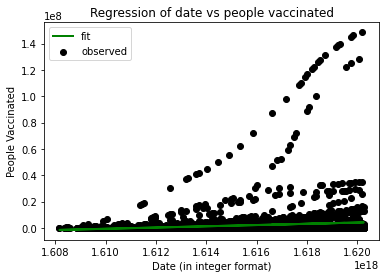

R-Squared:  0.016529172872882802


In [4]:
x = train_df['date']

#Reshape the Y set.
y = train_df['people_vaccinated']
x2 = np.array(x).reshape(-1,1)
#print(x2)

#Load the linear regression model
model = sklearn.linear_model.LinearRegression()
model.fit(x2, y)

#Create and show the scatter plot
plt.scatter(x2, y, color='black', label='observed')
plt.plot(x2, model.predict(x2), label='fit', color='Green', linewidth=2)
plt.xlabel('Date (in integer format)')
plt.ylabel('People Vaccinated')
plt.title('Regression of date vs people vaccinated')
plt.legend(loc='best')
plt.show()

#display the R-Squared score
r_sq = model.score(x2, y)
print("R-Squared: ", r_sq)


# Boxplot of Various Attributes

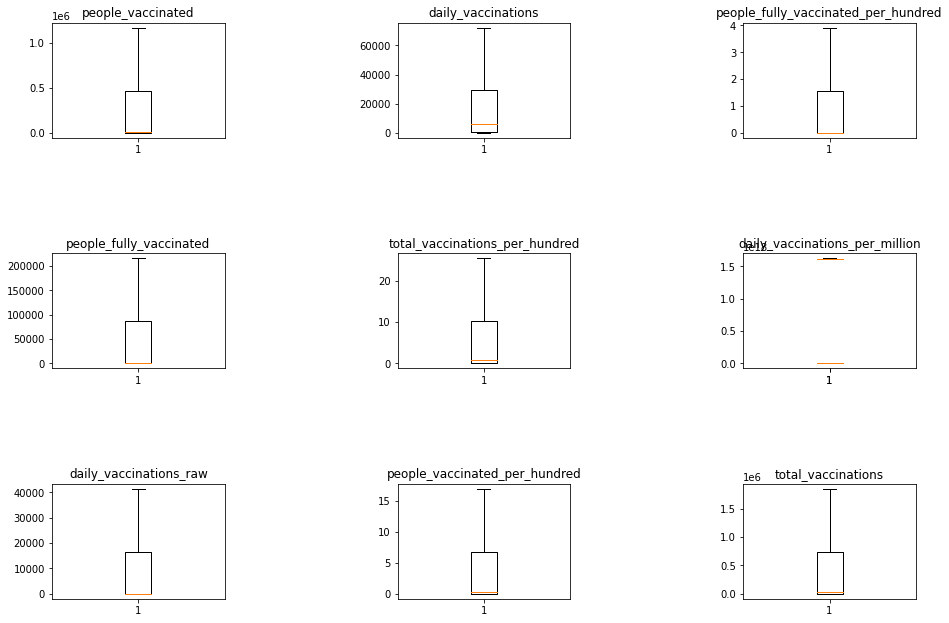

In [5]:
#Display boxplots
figRowCount = 3
figColCount = math.floor(len(featuresWithData) / figRowCount)
fig, axs = plt.subplots(figRowCount, figColCount)
xAxis = 0
yAxis = -1
for dataset in featuresWithData:
    xAxis = (xAxis + 1) % figRowCount
    if xAxis == 0:
        yAxis += 1
    axs[xAxis, yAxis].boxplot(df[dataset], autorange = True, showfliers = False)
    axs[xAxis, yAxis].set_title(dataset)

fig.subplots_adjust(left=0, right=1.5, bottom=0, top=1, hspace=1, wspace=1) #adjust fig for increased spacing
fig.set_figheight(8)
fig.set_figwidth(8)
plt.show() #Show the boxplots


# PairPlots

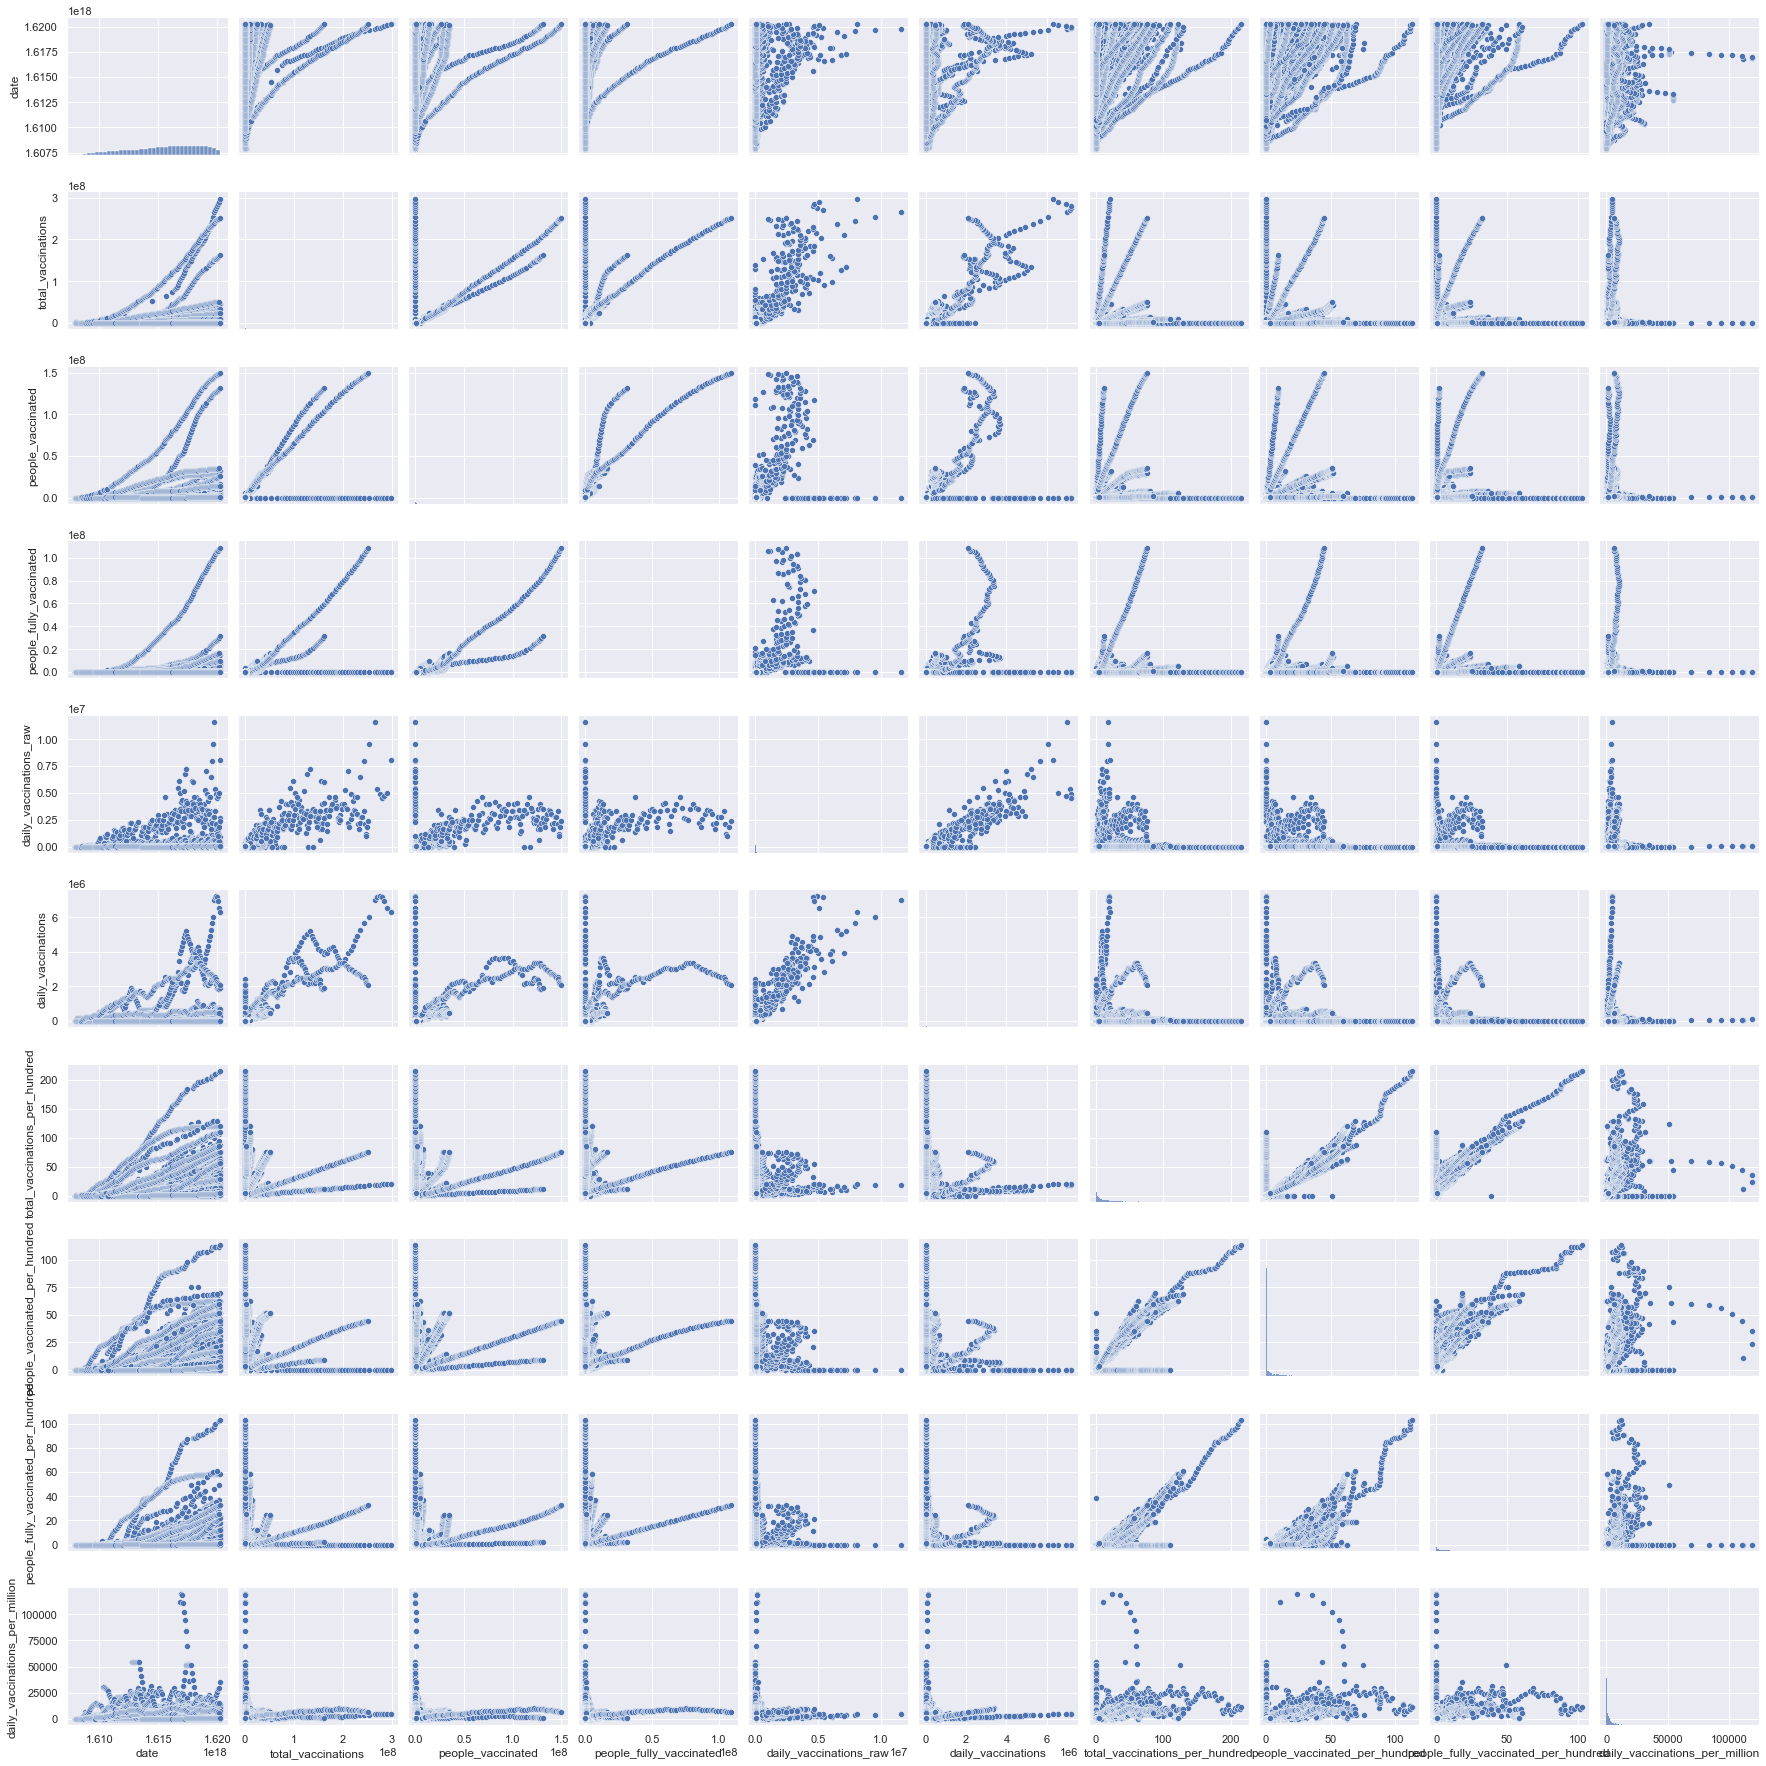

In [6]:
#Display pairplots
sns.set()
sns.pairplot(df[featuresWithData]) #show pairplots

# R2 Score vs Correlation

In [7]:
#Obtain the test dataset r_sq
x = test_df['date']
y = test_df['people_vaccinated']
x2 = np.array(x).reshape(-1,1)

#Display the R-Squared score again
r_sq = model.score(x2, y)
print("R-Squared: ", r_sq)

#Show the correlation
corr, _ = pearsonr(x, y)
print('Pearsons correlation, from test data, people_vaccinated vs date: ', corr)

#Show the difference between them
diff = r_sq - corr
percentDiff = (diff / corr) * 100
print("Difference: ", diff)
print("Percent difference: ", percentDiff)

R-Squared:  0.008965699514084546
Pearsons correlation, from test data, people_vaccinated vs date:  0.10909900849662689
Difference:  -0.10013330898254234
Percent difference:  -91.78205224994163


The R^2 value and correlation have a high difference.  It seems evident from this score, as well as the scatterplot, that linear regression isn't the optimal choice for this data set.

# Agglomerative Clustering

TypeError: ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

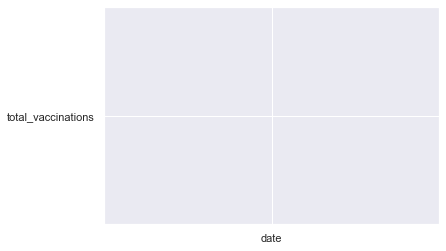

In [22]:
from sklearn.cluster import AgglomerativeClustering

#Create a dataframe with only the numeric featues
featuresWithData = [
    'date',
    'total_vaccinations',
    'people_vaccinated',
    'people_fully_vaccinated',
    'daily_vaccinations_raw',
    'daily_vaccinations',
    'total_vaccinations_per_hundred',
    'people_vaccinated_per_hundred',
    'people_fully_vaccinated_per_hundred',
    'daily_vaccinations_per_million'
]
featuresWithoutData = [
    'country',
    'iso_code',
    'vaccines',
    'source_name',
    'source_website'
]
dfNumbers = df.drop(columns=featuresWithoutData)

clustering = AgglomerativeClustering(n_clusters=2).fit(dfNumbers)

#Plot clustering
xyPairCount = round(len(dfNumbers.columns) / 2)
for k in range(xyPairCount):
    plt.scatter(dfNumbers.columns[k], dfNumbers.columns[k + 1], 'blue')
    plt.show()

# Logistic Regression

In [ ]:
#TODO for part 4

# K-Nearest-Neighbors

In [ ]:
#TODO for part 4
#2 features and a target 
#people vaccinated & daily_vaccinations
#people fully vaccinated per 100 

people_vacc = df['people_vaccinated']
daily_vacc = df['daily_vaccinations']

features = [people_vacc, daily_vacc]
features = np.array(features)
features = features.T

fully_vacc = df['people_fully_vaccinated_per_hundred']
over_under = []
for data in fully_vacc:
    if data >= 50:
        over_under.append('over')
    else:
        over_under.append('under')
        
#target 
df['halfway'] = over_under
y = df['halfway']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
plt.figure(figsize=(8, 8), dpi=80)

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                      np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('gray', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                label = j)
plt.title('Classifier (Training set)')
plt.xlabel('# of people vaccinated')
plt.ylabel('# of daily vaccinations')
plt.legend()
plt.show()



# ########################################################
# # Import LabelEncoder
# from sklearn import preprocessing
# #creating labelEncoder
# le = preprocessing.LabelEncoder()
# # Converting string labels into numbers.
# people_encoded=le.fit_transform(people_vacc)


# # converting string labels into numbers
# daily_encoded=le.fit_transform(daily_vacc)
# label=le.fit_transform(halfway)


# #combining people and daily into single list of tuples
# features=list(zip(people_encoded,daily_encoded))


# from sklearn.neighbors import KNeighborsClassifier

# model = KNeighborsClassifier(n_neighbors=3)

# # Train the model using the training sets
# model.fit(features,label)

# #Predict Output
# predicted= model.predict([[10000,5000]]) # 100,000: # of people vaccinated, 5000: # of daily vaccinations
# print(predicted)
# #########################################################
    

# Decision Tree 

In [ ]:
#TODO for part 4